R-squared score: 0.8520828533826301


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


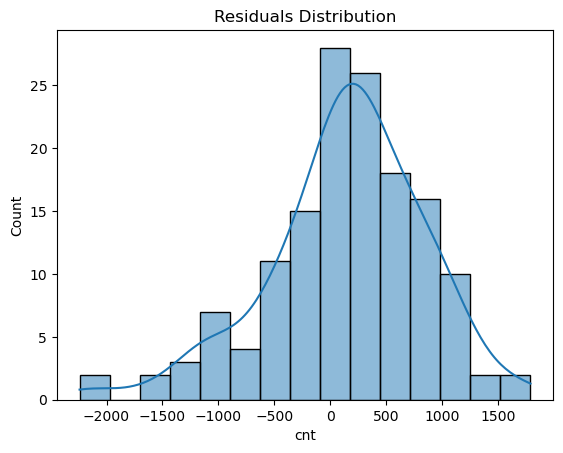

                       Feature   Importance
0                           yr  1987.528872
11               season_winter   802.730631
5                         temp   750.492847
10               season_summer   245.221851
6                        atemp   188.752803
4                   workingday   134.016348
3                      weekday    67.858245
1                         mnth   -28.498682
7                          hum  -150.913514
8                    windspeed  -217.977692
13             weathersit_Mist  -434.566939
2                      holiday  -491.400139
9                season_spring  -977.844224
12  weathersit_Light Snow/Rain -2079.970126


In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('day.csv')

# Convert categorical features to string values
data['season'] = data['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})
data['weathersit'] = data['weathersit'].map({1: 'Clear', 2: 'Mist', 3: 'Light Snow/Rain', 4: 'Heavy Rain/Snow'})

# One-hot encode categorical variables
data = pd.get_dummies(data, columns=['season', 'weathersit'], drop_first=True)

# Feature scaling
scaler = StandardScaler()
numerical_features = ['temp', 'atemp', 'hum', 'windspeed']
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Define features and target variable
X = data.drop(columns=['cnt', 'dteday', 'instant', 'casual', 'registered'])
y = data['cnt']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
print(f'R-squared score: {r2}')

# Residual analysis
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.show()

# Feature importance
importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': model.coef_})
importance = importance.sort_values(by='Importance', ascending=False)
print(importance)

# Provide business recommendations based on significant features
